In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
df= pd.read_csv('Train.csv')
data = df.values
print(data.shape)

(1600, 6)


In [23]:
x = data[:,:-1]
y = data[:,-1]
print(x.shape)
print(y.shape)

(1600, 5)
(1600,)


In [24]:
# x = (x-x.mean())/x.std()
# y = (y-y.mean())/y.std()
# print(x.shape)
# print(y.shape)

In [25]:
ones = np.ones(x.shape[0])
print(ones.shape)
x = np.array(x)
print(x.shape)

(1600,)
(1600, 5)


In [26]:
#Hypothesis Function

def hypo(x,theta):
    sum = theta[0]+theta[1]*x[0] +theta[2]*x[1] + theta[3]*x[2]+ theta[4]*x[3]+ theta[5]*x[4]
    return sum


def gradient(x,y,theta):
    grad = np.array([0,0,0,0,0,0])
    
    m = x.shape[0]
    
    for i in range(m):
        hx = hypo(x[i],theta)
        grad[0] += (hx-y[i])
        grad[1] += (hx-y[i])*x[i][0]
        grad[2] += (hx-y[i])*x[i][1]
        grad[3] += (hx-y[i])*x[i][2]
        grad[4] += (hx-y[i])*x[i][3]
        grad[5] += (hx-y[i])*x[i][4]
    
    return grad/m

#Cost Function

def error(x,y,theta):
    e = 0
    for i in range(x.shape[0]):
        e+= (hypo(x[i],theta) - y[i])**2
    return 0.5*e/x.shape[0]


def gradientDescent(x,y,lr=0.1):
    errors = []
    theta = np.random.randn(6)
    for i in range(50):
        grad = gradient(x,y,theta)
        e = error(x,y,theta)
        errors.append(e)
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        theta[2] = theta[2] - lr*grad[2]
        theta[3] = theta[3] - lr*grad[3]
        theta[4] = theta[4] - lr*grad[4]
        theta[5] = theta[5] - lr*grad[5] 
    return theta,errors


#Testing Phase

In [27]:
tf = pd.read_csv('Test.csv')
test = tf.values
print(test.shape)

(400, 6)


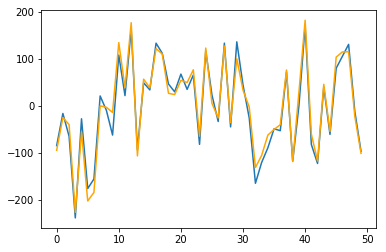

In [28]:
theta,errors = gradientDescent(x,y)
x_test = test[:,:-1]
y_test = test[:,-1]


hypos=[]
for i in range(50):
    hx = hypo(x_test[i],theta)
    hypos.append(hx)

#Displaying Expected vs Predicted Data graph on testing data

plt.plot(hypos,label='Predicted')
plt.plot(y_test[:50],color='orange',label='Expected')
plt.legend()
plt.show()

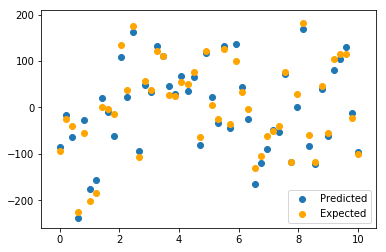

In [30]:
#Scattered Representation of Data Predicted vs Data Actual
axis = np.linspace(0,10,50)
plt.scatter(axis,hypos,label='Predicted')
plt.scatter(axis,y_test[:50],color='orange',label='Expected')
plt.legend()
plt.show()

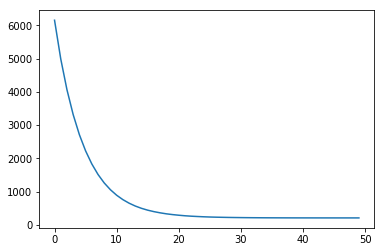

In [29]:
#Minimised Error

plt.plot(errors)